In [8]:
folder = 'LASSENA_BEAM_PROFILE/'
import matplotlib.pyplot as plt
import numpy as np
import LASSENA_Readout as LAS
import HoughTransform as HT
from mpl_toolkits.mplot3d import Axes3D
data, dark, OnCheck, Myst = LAS.get_data_loc(folder)

37
14
16
18
15
15
15
16
15
15
14
13
13
13
11
13
13
13
14
16
15
16
15
15
15
12
13
14
16
13
14
13
15
15
14
14
15
14
16
17
17
17
16
13
14
16
15
15
16
14
19
17
16
16
18
18
18
19
20
22
23
22
21
20
19
20
18
17
16
15
16
16
18
16
18
20
19
19
20
18
18
18
19
18
20
19
19
21
21
21
20
20
21
23
21
20
22
21
20
21
20
23
21
23
23
22
24
25
23
21
22
21
23
24
26
24
24
24
27
28
28
25
25
26
26
25
24
25
26
25
25
26
25
26
26
24
21
27
24
22
17
11
21
35
32
29
24
22
37
37
33
32
29
27
39
37
36
34
35
31
29
28
27
27
26
25
21
16
11
11
10
9
8
7
5
3
14
15
14
11
14
14
16
14
16
17
16
17
16
15
16
16
17
14
14
15
14
14
16
16
15
14
14
14
14
15
14
13
14
13
13
12
12
13
12
12
14
13
15
14
14
13
12
12
13
13
14
12
14
15
13
11
14
15
14
15
17
15
15
16
14
15
15
15
15
16
16
16
15
16
14
16
15
15
16
16
16
15
16
15
14
15
15
15
15
14
15
14
14
13
14
14
14
14
14
13
13
14
15
14
15
14
14
14
15
15
18
18
17
15
16
18
16
18
19
18
17
15
14
15
16
15
16
14
15
15
16
16
17
18
18
18
17
17
18
18
17
17
17
18
17
17
18
18
18
18
20
20
18
19
18
18
17
17
15


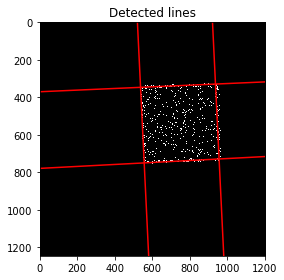

/Users/edwardtaylor/Year 4 Project/HoughTransform.py:35: RuntimeWarning: divide by zero encountered in double_scalars
  x = (c1-c2) / (m2-m1)


In [9]:
dark_image = LAS.avg_bunch(dark[0])
img_for_roi = dark_image-LAS.avg_bunch(data[0])
ROI_pts = HT.cross_points(img_for_roi,HT.hough_grid(img_for_roi,thresh_step=30))

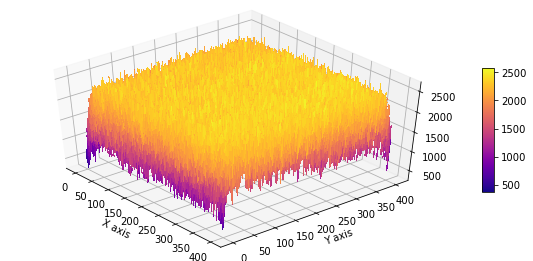

array([[ 624.0902832 ,  443.18334966,  490.73125511, ...,  757.05828933,
         770.45065855,  454.44940954],
       [ 759.20308265,  521.58045612,  610.87174873, ...,  985.5579046 ,
         544.87343417,  681.5848848 ],
       [ 311.50407244,  316.13931391,  783.05490685, ..., 1049.59995977,
         880.73586109,  489.0772555 ],
       ...,
       [ 515.6476153 ,  876.62756341,  741.20994061, ..., 1450.81154502,
        1408.43353731, 1181.68220625],
       [ 827.47924196,  402.61812315,  516.36104137, ..., 1653.47748734,
         661.44933772, 1012.63096982],
       [ 628.75689529,  482.25196618,  421.96135682, ..., 1409.98591643,
         470.36205989, 1335.83092634]])

In [113]:
avg_PV_roi_for_each_img = LAS.get_pv(data,ROI_pts,dark_image)[0]

from matplotlib import cm
params = {'legend.fontsize': '22',
          'figure.figsize': (10, 8),
         'axes.labelsize': '22',
         'axes.titlesize':'22',
         'xtick.labelsize':'22',
         'ytick.labelsize':'22'}

def beam_profile(data,ROI_pts): 
    images = LAS.get_images(data[0])
    shape_x = int(ROI_pts[3][1]-ROI_pts[0][1])
    shape_y = int(ROI_pts[1][0]-ROI_pts[0][0])
    cum_ratio_img = np.zeros((shape_x,shape_y))
    for image in images:
        image_in_ROI = HT.four_point_transform(image-dark_image, ROI_pts)
        avg_PV_ROI = np.mean(image_in_ROI)
        ratio = image_in_ROI/avg_PV_ROI
        cum_ratio_img += np.add(cum_ratio_img,ratio)
    X = np.arange(0,cum_ratio_img.shape[0],1)
    Y = np.arange(0,cum_ratio_img.shape[1],1)
    X,Y = np.meshgrid(Y,X)
    Z = cum_ratio_img
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(2,1,2,projection='3d')
    surf = ax.plot_surface(X,Y,Z,cmap=cm.plasma,antialiased=False,cstride=1,rstride=1)
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.view_init(elev=45,azim=-40)
    fig.colorbar(surf,shrink=0.5,aspect=10)

    plt.show()
    return cum_ratio_img

beam_profile(data,ROI_pts)